<a href="https://colab.research.google.com/github/AlejandroJuarez98/MLEARNING20/blob/master/CL04_Regresi%C3%B3n_log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Aprendizaje supervisado: Regresión logística**
- Es un tipo de análisis de regresión utilizado para predecir el resultado de una variable categórica (una variable que puede adoptar un número limitado de categorías) en función de las variables independientes o predictoras.

- Es un método de regresión que permite estimar la probabilidad de una variable cualitativa binaria en función de una variable cuantitativa.

In [3]:
 import numpy
 import pandas as pd
 import matplotlib.pyplot as plt

dataset = pd.read_csv('https://raw.githubusercontent.com/AlejandroJuarez98/MLEARNING20/master/Social_network_ads.csv')
dataset.head(5)

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
# Creación de variables para nuestro modelo
x = dataset.iloc[:, :-1] # Selección de columnas cuantitativas
y = dataset.iloc[:, -1] # Selección de columnas cualitativas binarias

In [5]:
# Division del dataset en conjunto de entrenamiento y conjunto de prueba
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Normalización de datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 0)

# Aplicamos Normalización de datos
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [6]:
# Entrenamiento del modelo de regresión logistica con el conjunto de entrenamiento.
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state = 0)
logistic.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
# Predecir un nuevo resultado.
print(logistic.predict(sc.transform([[30, 87000]])))

[0]


In [8]:
# Predicción de datos del conjunto de prueba
y_pred = logistic.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


In [9]:
print(y_test.values)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


In [10]:
# Comprobando con exactitud
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) # Aproximacion del modelo

0.89

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'cnap'
  if __name__ == '__main__':
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


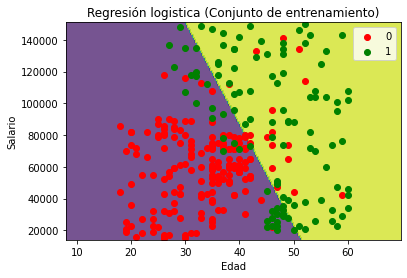

In [13]:
# Visualización de los resultados del conjunto de entrenamiento.
from matplotlib.colors import ListedColormap

x_set, y_set = sc.inverse_transform(x_train), y_train
x1, x2 = numpy.meshgrid(numpy.arange(start= x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 0.25),
                        numpy.arange(start= x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(x1, x2, logistic.predict(sc.transform(numpy.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cnap = ListedColormap(('red', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(numpy.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Regresión logistica (Conjunto de entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'cnap'
  # Remove the CWD from sys.path while we load stuff.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


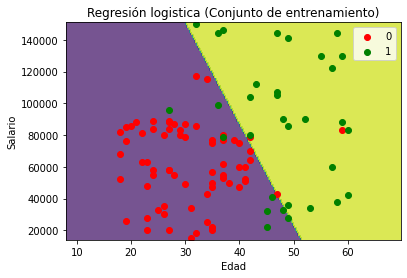

In [15]:
# Visualizacion de los resultados por modelo de prueba
# Visualización de los resultados del conjunto de entrenamiento.
from matplotlib.colors import ListedColormap

x_set, y_set = sc.inverse_transform(x_test), y_test
x1, x2 = numpy.meshgrid(numpy.arange(start= x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 0.25),
                        numpy.arange(start= x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(x1, x2, logistic.predict(sc.transform(numpy.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cnap = ListedColormap(('red', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(numpy.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Regresión logistica (Conjunto de entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.legend()
plt.show()